[6 0 0 ... 5 5 5]


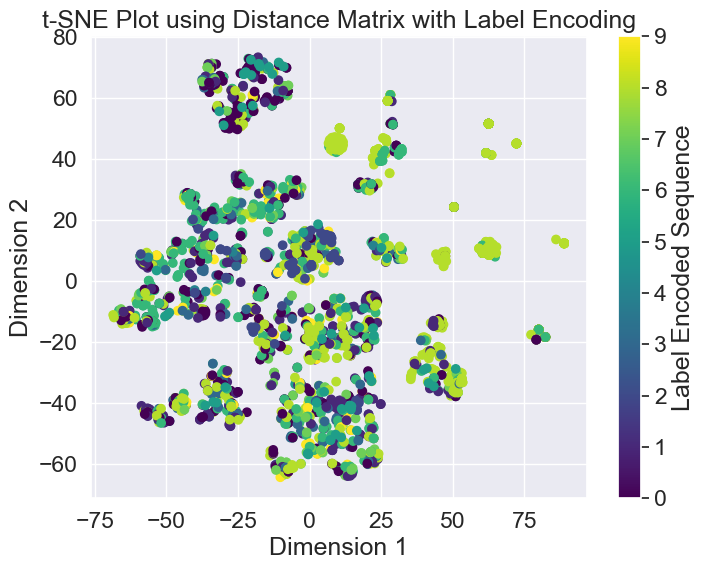

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Load distance matrix
distance_matrix = np.load('alpha_distance_mouse_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("data_alpha.csv") 

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(distance_matrix)

# Visualize t-SNE dimensionality reduction results, colored with label-encoded sequence features
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sequences_encoded, cmap='viridis')
plt.colorbar(label='Label Encoded Sequence')
plt.title('t-SNE Plot using Distance Matrix with Label Encoding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [82]:
data

,Unnamed: 0,complex.id,gene,cdr3_a_aa,v_a_gene,j_a_gene,species,antigen.epitope,antigen.gene,antigen.species,vdjdb.score
0,1373,157,TRA,CILSGGSNYKLTF,TRAV21/DV12*01,TRAJ53*01,MusMusculus,SSLENFRAYV,PA,InfluenzaA,3
1,1617,279,TRA,CAASEGSGSWQLIF,TRAV14-1*01,TRAJ22*01,MusMusculus,ASNENMETM,NP,InfluenzaA,3
2,1619,280,TRA,CAASETSGSWQLIF,TRAV14-1*01,TRAJ22*01,MusMusculus,ASNENMETM,NP,InfluenzaA,3
3,1635,288,TRA,CATVYAQGLTF,TRAV8-2*01,TRAJ26*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,3
4,1747,344,TRA,CAAVTGNTGKLIF,TRAV4-2*01,TRAJ37*01,MusMusculus,ASNENMETM,NP,InfluenzaA,3
...,...,...,...,...,...,...,...,...,...,...,...
2187,92634,0,TRA,CATGNEEITF,TRAV8D-1*01,TRAJ48*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,0
2188,92644,0,TRA,CAARGYNQGKLIF,TRAV14-2*01,TRAJ23*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,1
2189,92645,0,TRA,CATSDTNAYKVIF,TRAV8-2*01,TRAJ30*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,1
2190,92646,0,TRA,CALSDTGANTGKLTF,TRAV6-5*01,TRAJ52*01,MusMusculus,SQLLNAKYL,GAP50,PlasmodiumBerghei,0


In [83]:
data.isnull().sum()

Unnamed: 0         0
complex.id         0
gene               0
cdr3_a_aa          0
v_a_gene           0
j_a_gene           0
species            0
antigen.epitope    0
antigen.gene       0
antigen.species    0
vdjdb.score        0
dtype: int64

In [84]:
from sklearn.decomposition import PCA
import time

# Initialize PCA with 4 components
pca = PCA(n_components=1000)

time_start = time.time()
# Apply PCA to X_subset
X_pca = pca.fit_transform(distance_matrix)

# Extract the principal components
#pca_result = pca.components_

print ('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))
print ('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

PCA done! Time elapsed: 2.089953899383545 seconds
Variance explained per principal component: [6.35759999e-01 9.08206543e-02 4.90586388e-02 3.53049804e-02
 3.27304802e-02 2.36252329e-02 1.85493292e-02 1.44501146e-02
 1.19277327e-02 1.02118636e-02 1.00164185e-02 6.41905429e-03
 5.74220244e-03 4.90475580e-03 4.49044067e-03 4.07287868e-03
 3.45645856e-03 3.31435835e-03 2.74475108e-03 2.58126626e-03
 2.28983706e-03 1.81757963e-03 1.61029406e-03 1.57329159e-03
 1.48117853e-03 1.36832059e-03 1.15123158e-03 1.10710255e-03
 9.12188857e-04 9.08775385e-04 8.71115557e-04 8.13456350e-04
 6.69405085e-04 6.41860168e-04 6.21317199e-04 5.50704030e-04
 5.36441013e-04 4.81899703e-04 4.47753682e-04 4.33110643e-04
 4.03400348e-04 3.89369904e-04 3.48050824e-04 3.46336461e-04
 3.43020426e-04 3.09803025e-04 2.98675481e-04 2.82045398e-04
 2.63297579e-04 2.53177858e-04 2.38507020e-04 2.17297964e-04
 2.10950071e-04 2.09586336e-04 1.91498766e-04 1.85544688e-04
 1.83016673e-04 1.79155661e-04 1.71754564e-04 1.6434

In [85]:
# Utility function to visualize the outputs of PCA and t-SNE
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-735.756251803882, 153.54689067547847, '0'),
  Text(-606.1319854064518, -181.33441072377116, '1'),
  Text(-494.2834693200335, -188.0846795378894, '2'),
  Text(-590.0548872353469, -97.65863738330194, '3'),
  Text(-974.2926883066823, -191.8120064358854, '4'),
  Text(-174.2378794568756, -209.37081906896003, '5'),
  Text(-595.5498770334025, -18.099261653974025, '6'),
  Text(-557.1284661192902, -158.56478116087536, '7'),
  Text(1268.3733428841015, 187.91279132063826, '8'),
  Text(-520.1549311746272, -242.61363343455392, '9')])

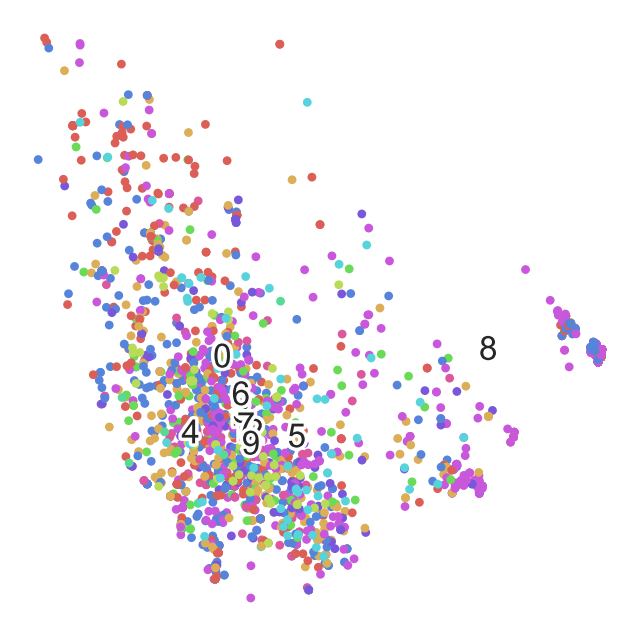

In [86]:
pca_df = pd.DataFrame(columns=['pca1', 'pca2', 'pca3', 'pca4'])

pca_df['pca1'] = X_pca[:, 0]
pca_df['pca2'] = X_pca[:, 1]
pca_df['pca3'] = X_pca[:, 2]
pca_df['pca4'] = X_pca[:, 3]

# Select the first two components from the DataFrame
pca_df_subset = pca_df[['pca1', 'pca2']]

# Visualize the PCA output without coloring by labels
fashion_scatter(pca_df_subset.values, colors=sequences_encoded)


In [87]:
# Imports

import time
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

%matplotlib inline

RS = 1729; # Fix the random state for t-SNE. This makes the lab results reproducible.

t-SNE done! Time elapsed: 4.530610799789429 seconds


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-19.718004, 8.373371, '0'),
  Text(-12.219984, -14.417366, '1'),
  Text(-1.5245844, 8.306559, '2'),
  Text(-11.911823, -15.805105, '3'),
  Text(-39.671013, 1.9802226, '4'),
  Text(2.495225, -17.69566, '5'),
  Text(-9.678199, 4.3816934, '6'),
  Text(-7.684727, -8.811885, '7'),
  Text(25.02935, 6.75539, '8'),
  Text(-6.5092716, -12.080007, '9')])

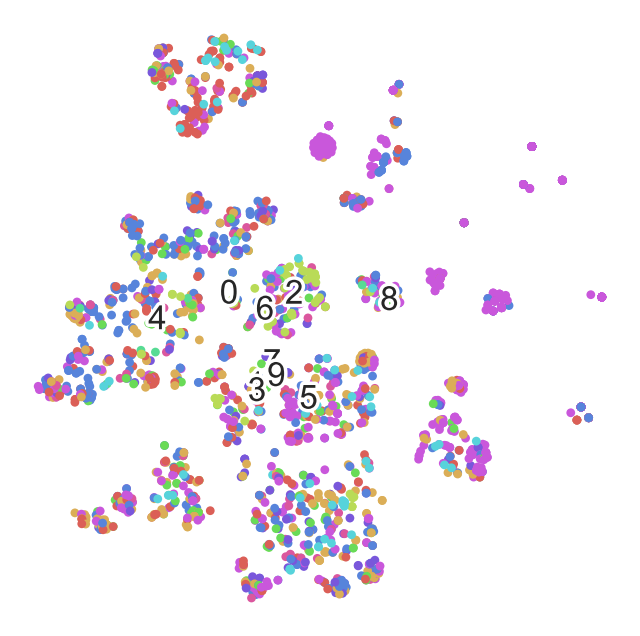

In [88]:
from sklearn.manifold import TSNE
import time

# Assuming X_subset is defined as a subset of your data
# Initialize t-SNE with random state RS
tsne = TSNE(random_state=RS)

# Start timing
time_start_tsne = time.time()

# Apply t-SNE to X_subset
X_tsne = tsne.fit_transform(distance_matrix)

# End timing
time_elapsed_tsne = time.time() - time_start_tsne

# Print the time taken for t-SNE
print('t-SNE done! Time elapsed: {} seconds'.format(time_elapsed_tsne))

fashion_scatter(X_tsne, colors=sequences_encoded)

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


UMAP done! Time elapsed: 4.935559034347534 seconds


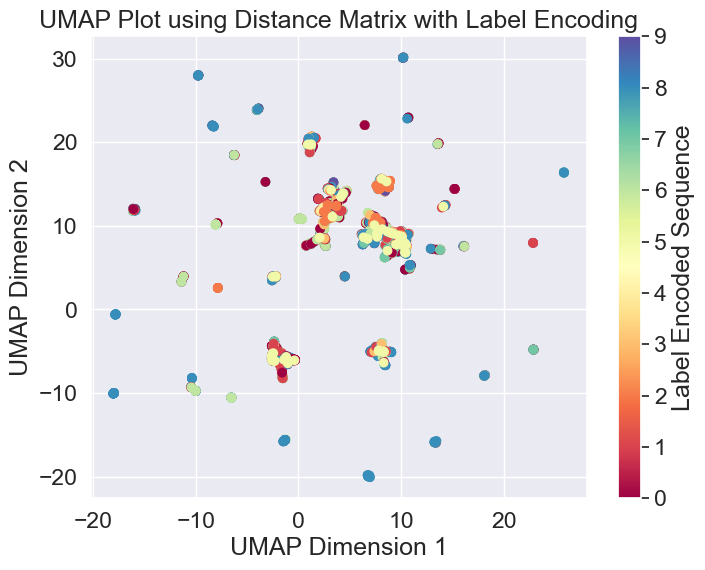

In [102]:
import umap
import numpy as np
import matplotlib.pyplot as plt
# Initialize UMAP and perform dimensionality reduction
umap_model = umap.UMAP(random_state=RS)
time_start_umap = time.time()
X_umap = umap_model.fit_transform(distance_matrix)
time_elapsed_umap = time.time() - time_start_umap

# Print the time taken for UMAP
print('UMAP done! Time elapsed: {} seconds'.format(time_elapsed_umap))

# Visualize UMAP dimensionality reduction results, colored with label-encoded sequence features
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=sequences_encoded, cmap='Spectral')
plt.colorbar(label='Label Encoded Sequence')
plt.title('UMAP Plot using Distance Matrix with Label Encoding')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [108]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap
from bokeh.models import ColumnDataSource, ColorBar, HoverTool
from bokeh.palettes import Category20
from bokeh.io import output_notebook

# Load distance matrix
distance_matrix = np.load('alpha_distance_mouse_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("data_alpha.csv")  

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(distance_matrix)

# Create a Bokeh graphics object
p = figure(title="t-SNE Plot using Distance Matrix with Label Encoding")

# color map
mapper = linear_cmap(field_name='label', palette=Category20[20], low=min(sequences_encoded), high=max(sequences_encoded))

# Add data to Bokeh graphics objects
source = ColumnDataSource(data=dict(
    x=X_tsne[:, 0],
    y=X_tsne[:, 1],
    label=sequences_encoded,
    color=sequences_encoded,
    sequence_name=sequences  # Add sequence names to ColumnDataSource
))
p.scatter('x', 'y', source=source, fill_color=mapper, line_color=None, fill_alpha=0.6, size=10)

# Add color bar
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0,0))
p.add_layout(color_bar, 'right')

# Added HoverTool to display sequence names
hover = HoverTool(tooltips=[("Sequence", "@sequence_name")])
p.add_tools(hover)

# Show Bokeh graph
output_notebook()
show(p)


Loading BokehJS ...

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Text(0, 0.5, 'UMAP Dimension 2')

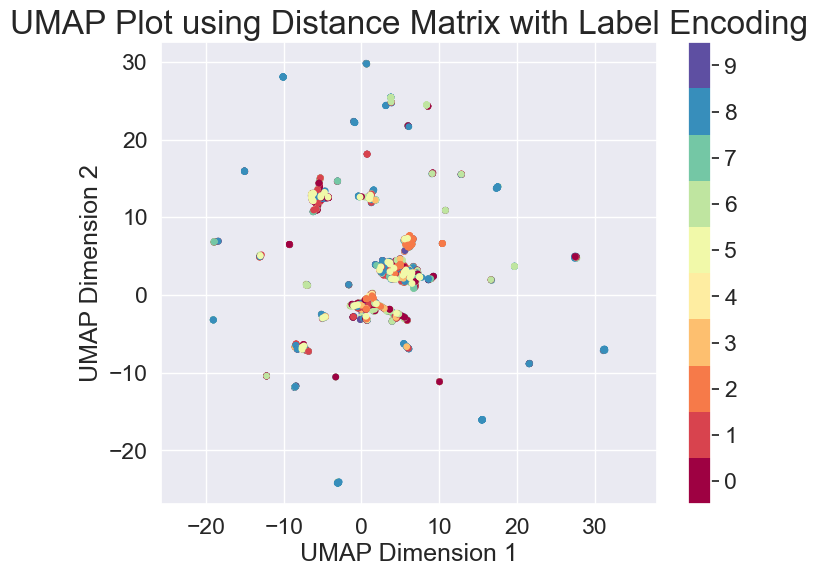

In [104]:
import umap
import numpy as np
import matplotlib.pyplot as plt
# Get the data
X_digits = distance_matrix

# Initialize UMAP with desired parameters
umap_emb = umap.UMAP(random_state=RS)

# Fit and transform the data to obtain the embedded representation
X_umap = umap_emb.fit_transform(X_digits)

plt.figure(figsize=(8, 6))


plt.scatter(X_umap[:, 0], X_umap[:, 1], c=sequences_encoded, cmap='Spectral', s=15)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP Plot using Distance Matrix with Label Encoding', fontsize=24);
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

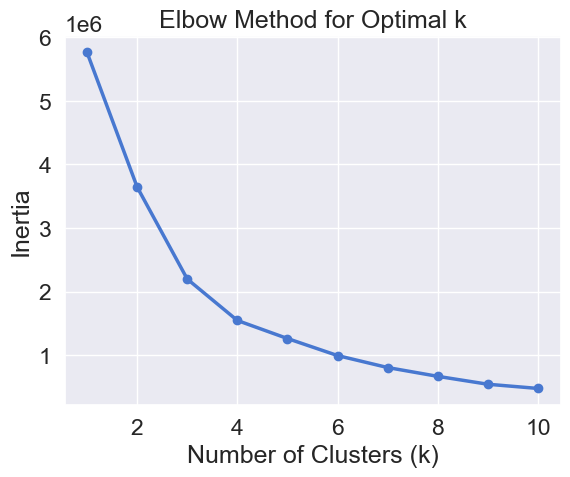

In [92]:
# Import KMeans from sklearn.cluster
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_tsne is your t-SNE transformed data
# Define a range of k values to try
k_values = range(1, 11)  # Try k from 1 to 10 clusters

# Initialize an empty list to store the inertia values (Sum of squared distances of samples to their closest cluster center)
inertia_values = []

# Iterate through each value of k
for k in k_values:
    # Initialize KMeans clustering for current value of k
    kmeans = KMeans(n_clusters=k, random_state=RS)
    # Fit KMeans clustering to the data
    kmeans.fit(X_tsne)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


'for i, label in enumerate(sequences_original):\n    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=1.5)\n\nplt.show()'

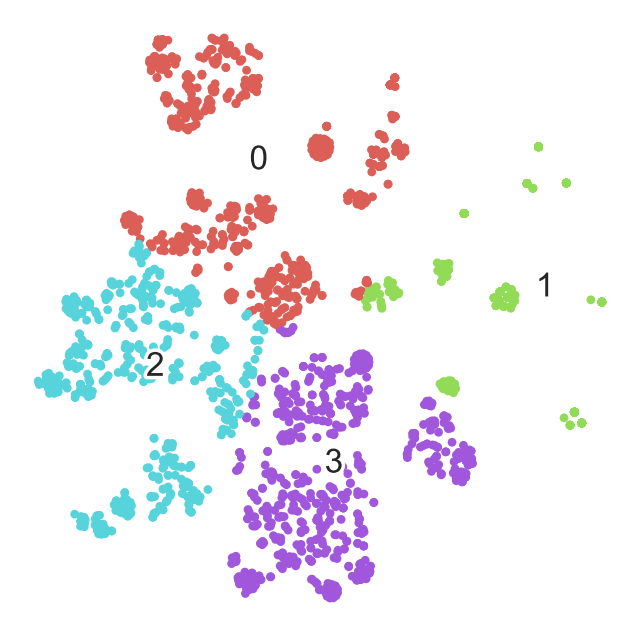

In [93]:
from sklearn.cluster import KMeans

# Assuming X_tsne is your t-SNE transformed data
# Assuming n_clusters is the number of clusters you want to find
k = 4 

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=RS)

# Perform KMeans clustering on the t-SNE transformed data
kmeans.fit(X_tsne)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clustering result
fashion_scatter(X_tsne, colors=cluster_labels)
# add labels
'''for i, label in enumerate(sequences_original):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=1.5)

plt.show()'''

/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

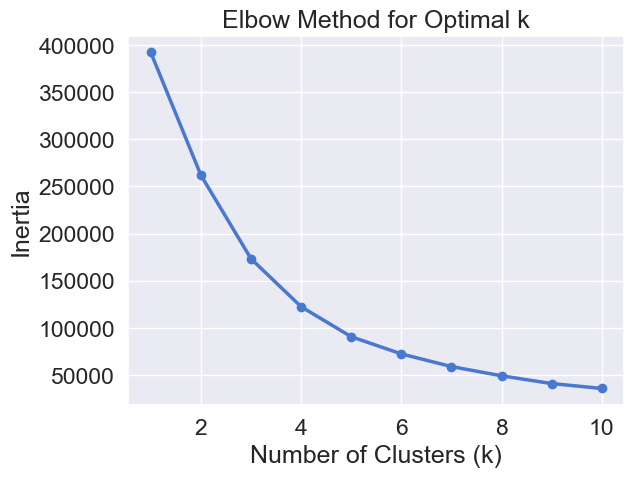

In [94]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming X_umap is your UMAP transformed data
# Define a range of k values to try
k_values = range(1, 11)  # Try k from 1 to 10 clusters

# Initialize an empty list to store the inertia values (Sum of squared distances of samples to their closest cluster center)
inertia_values = []

# Iterate through each value of k
for k in k_values:
    # Initialize KMeans clustering for current value of k
    kmeans = KMeans(n_clusters=k, random_state=RS)
    # Fit KMeans clustering to the data X_umap
    kmeans.fit(X_umap)
    # Append the inertia value to the list
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 [Text(-7.483866, -9.654115, '0'),
  Text(80.22961, -13.034574, '1'),
  Text(57.944733, 37.139336, '2'),
  Text(21.40761, -5.6555767, '3'),
  Text(36.90346, -23.960503, '4'),
  Text(-20.338741, 59.37937, '5')])

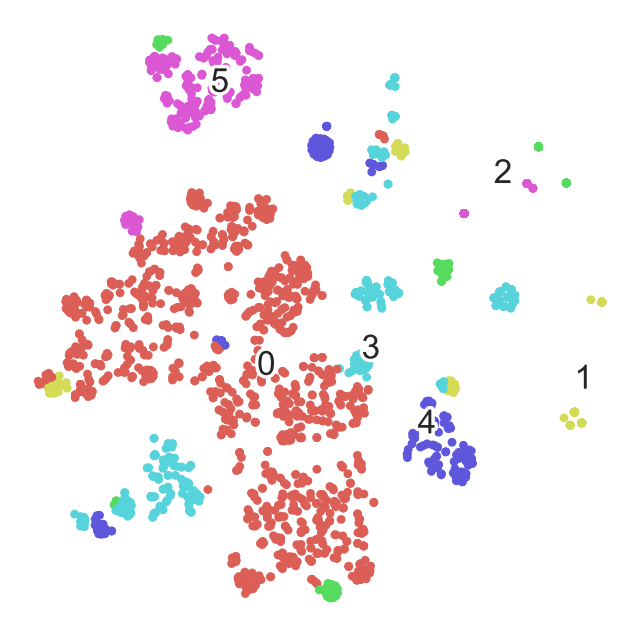

In [95]:
from sklearn.cluster import KMeans

# Assuming X_umap is your UMAP transformed data
# Assuming n_clusters is the number of clusters you want to find
k = 6  

# Initialize KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=RS)

# Perform KMeans clustering on the UMAP transformed data
kmeans.fit(X_umap)

# Get cluster labels
cluster_labels = kmeans.labels_

# Visualize the clustering result
fashion_scatter(X_tsne, colors=cluster_labels)


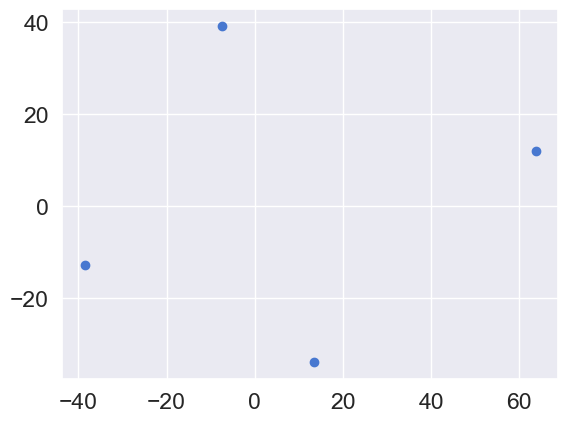

In [96]:
from numpy.random import default_rng

def kmeans(k, X):
    # randomly assign labels to the data
    rng = default_rng()
    labels = np.array([i%k for i in range(len(X))])
    new_labels = np.ones(len(X))
    # set up a while loop that will run until the data labels no longer change
    while True:
        # Calculate the centroids of the data        
        centres=np.array([np.sum(X[labels==ki], axis = 0)/len(X[labels==ki]) \
                          if len(X[labels==ki]) != 0 else centres[ki] for ki in range(k)])
        # For each datapoint:
        for i, x in enumerate(X):
            #Calculate the squared Euclidean distance to each centroid
            dist_to_centres = np.array([np.linalg.norm(x-a)**2 for a in centres])            
            # Assign new labels based on distance to the centroid
            new_labels[i] = np.argmin(list(dist_to_centres))
        # If all the new labels are equal to the old labels, break out of the while loop    
        if np.all(labels == new_labels):
            break
        # Assign the values of the new labels to the variable labels
        labels[:]=new_labels
    # return the centres and the labels.
    return centres, labels

fig, ax= plt.subplots()
centres, labels = kmeans(4, X_tsne)
#centres, labels = kmeans(6, X_umap)
ax.scatter(centres[:,0],centres[:,1])
plt.show()

[6 0 0 ... 5 5 5]


'for i, label in enumerate(sequences_original):\n    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=8)\n\nplt.show()'

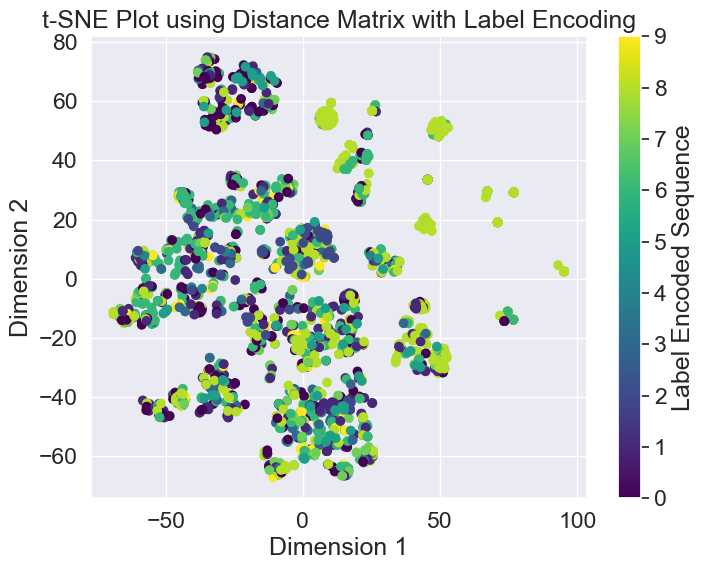

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Load distance matrix
distance_matrix = np.load('alpha_distance_mouse_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("data_alpha.csv")  

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# Perform t-SNE dimensionality reduction
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(distance_matrix)

# Create a mapping dictionary between label encoding and original label value
label_mapping = {label_encoded: label_original for label_encoded, label_original in zip(encoder.transform(encoder.classes_), encoder.classes_)}

# Replace label encoding with original tag value
sequences_original = [label_mapping[label] for label in sequences_encoded]

# Visualize t-SNE dimensionality reduction results, colored by original label values
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=sequences_encoded, cmap='viridis')
plt.colorbar(scatter, label='Label Encoded Sequence')
plt.title('t-SNE Plot using Distance Matrix with Label Encoding')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# add label
"""for i, label in enumerate(sequences_original):
    plt.text(X_tsne[i, 0], X_tsne[i, 1], label, fontsize=8)

plt.show()"""

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# Load distance matrix
distance_matrix = np.load('alpha_distance_mouse_matrix.npy')

# Load the dataset containing sequence features
data = pd.read_csv("data_alpha.csv")  

# Extract sequence features (antigen.epitope)
sequences = data['antigen.epitope']

# Label encoding of sequence features
encoder = LabelEncoder()
sequences_encoded = encoder.fit_transform(sequences)
print(sequences_encoded)

# Get the label corresponding to the encoding
encoded_labels = encoder.classes_
print(encoded_labels)


[6 0 0 ... 5 5 5]
['ASNENMETM' 'HGIRNASFI' 'KAVYNFATC' 'LSLRNPILV' 'SIINFEKL' 'SQLLNAKYL'
 'SSLENFRAYV' 'SSPPMFRV' 'SSYRRPVGI' 'TVYGFCLL']


In [99]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


X = X_umap


# Calculate the silhouette coefficient for each cluster number
for n_clusters in range(2, 11):
    # Create a KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # perform clustering
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


For n_clusters = 2 The average silhouette_score is : 0.45767188


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.50901264


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.5046164
For n_clusters = 5 The average silhouette_score is : 0.542909


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.5587075


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.47371173


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.5165509
For n_clusters = 9 The average silhouette_score is : 0.524331
For n_clusters = 10 The average silhouette_score is : 0.5354445


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


X = X_tsne


# Calculate the silhouette coefficient for each cluster number
for n_clusters in range(2, 11):
    # Create a KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # perform clustering
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.35049623


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.39877975


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.40107572


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.40409404
For n_clusters = 6 The average silhouette_score is : 0.41537514


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.42759615


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.4553618
For n_clusters = 9 The average silhouette_score is : 0.470477


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.47722146


In [101]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


X = distance_matrix


# Calculate the silhouette coefficient for each cluster number
for n_clusters in range(2, 11):
    # Create a KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    # perform clustering
    cluster_labels = kmeans.fit_predict(X)
    # Calculate silhouette coefficient
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.5016925442242772


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.33799938436416593


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 4 The average silhouette_score is : 0.29912374098241024


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.2932434080903461


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.3047981288443859


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is : 0.31844293650456734


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is : 0.322628441694577


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is : 0.32302820050305847


/Users/guanyingxue/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is : 0.32326978285401087
